In [5]:
from keras.preprocessing.text import Tokenizer
# tokenizer: 토큰화
tok = Tokenizer()
text = "Regret for wasted time is more wasted time"
tok.fit_on_texts([text]) #사전을 생성
#[text]: 단어 단위 토큰화
#text: 문자 단위 토큰화

In [8]:
tok.word_index
test = "Regret for wasted hour is more wasted time"
seq = tok.texts_to_sequences([test])
#사전에 test에 저장된 단어가 있는지 확인

In [14]:
from keras.preprocessing.sequence import pad_sequences
#pad_sequences: 샘플의 길이를 동일하게 해주는 함수
pad_sequences([[1,2,3],[2,3,4,5],[6,7]],maxlen=3, padding='post')

array([[1, 2, 3],
       [3, 4, 5],
       [6, 7, 0]])

In [ ]:
#워드 임베딩: 문장 내의 단어들을 밀집벡터로 만드는 작업 (Embedding)
#원핫벡터(고차원, 희소벡터, 기억장소낭비)
#밀집벡터(저차원, 실수값)
# ex) 원핫벡터:001000....0000
# ex) 밀집벡터: [0.1, -1.5, 1.9, 2.4]

# ex) text = [[0,1,2,3],[3,4,1,5]]
# => Embedding(6,2,4)  #6:단어개수(input_dim), 2:벡터크기(output_dim), 5:시퀀스길이(input_length)
# => 0 -> [1.3, 1.5], 1 -> [2.5, 4.1]...

In [21]:
# functional API
from keras.layers import Input, Dense, LSTM
from keras.models import Model

In [20]:
# inp = Input(shape=(10,)) #10개 입력
# h1 = Dense(32, activation='relu')(inp)
# h2 = Dense(16, activation='relu')(h1)
# outp = Dense(1, activation='sigmoid')(h2)
# model = Model(inputs=inp, outputs=outp)

In [ ]:
# model.compile(optimizer="rmsprop", loss='categorical_crossentropy', metrics=['accuracy'])
# model.fit(xdata, ydata)

In [ ]:
#rnn 구조를 함수형 api로 표현

In [23]:
inp = Input(shape=(50,1))
h1 = LSTM(10)(inp)
h2 = Dense(10, activation="relu")(h1)
outp = Dense(1, activation='sigmoid')(h2)
model = Model(inputs=inp, outputs=outp)

In [25]:
#MLP (Multi-Layer Perceptron) 로 텍스트 분류
from keras.preprocessing.text import Tokenizer
import numpy as np

In [26]:
texts = ['먹고 싶은 사과', '먹고 싶은 바나나', '길고 노란 바나나 바나나', '저는 과일이 좋아요']

In [27]:
#토큰화
tok = Tokenizer()
tok.fit_on_texts(texts)
print(tok.word_index)

{'바나나': 1, '먹고': 2, '싶은': 3, '사과': 4, '길고': 5, '노란': 6, '저는': 7, '과일이': 8, '좋아요': 9}


In [31]:
tok.texts_to_matrix(texts, mode='tfidf') #DTM
# tok.texts_to_matrix(texts, mode='count')
tok.texts_to_matrix(texts, mode='binary') #단어의 존재 유무
tok.texts_to_matrix(texts, mode='freq') #문장 단위 등장 비율

array([[0.        , 0.        , 0.33333333, 0.33333333, 0.33333333,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.33333333, 0.33333333, 0.33333333, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.5       , 0.        , 0.        , 0.        ,
        0.25      , 0.25      , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.33333333, 0.33333333, 0.33333333]])

In [32]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [33]:
newsData = fetch_20newsgroups(subset='train') #test, all 지정 가능

In [34]:
print(newsData.keys())

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])


In [39]:
len(newsData.data) #11314
print(newsData.target)
print(newsData.target_names)

[7 4 4 ... 3 1 8]
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [45]:
df = pd.DataFrame(newsData.data, columns=['email'])
df['target'] = newsData.target
df['target'] = pd.Series(newsData.target)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11314 entries, 0 to 11313
Data columns (total 2 columns):
email     11314 non-null object
target    11314 non-null int32
dtypes: int32(1), object(1)
memory usage: 132.7+ KB


In [49]:
df.isnull().values.any()

False

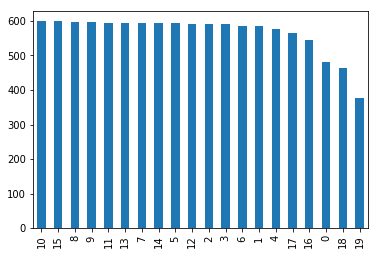

In [55]:
df['email'].nunique() #unique 한 값들의 개수 : 11314개 샘플
df['target'].nunique() #20가지 주제
#주제별 샘플의 개수 확인
df['target'].value_counts().plot(kind='bar')

In [56]:
df.groupby('target').size()

target
0     480
1     584
2     591
3     590
4     578
5     593
6     585
7     594
8     598
9     597
10    600
11    595
12    591
13    594
14    593
15    599
16    546
17    564
18    465
19    377
dtype: int64

In [57]:
newsDataTest = fetch_20newsgroups(subset='test', shuffle=True)

In [58]:
trainEmail = df['email']
trainLabel = df['target']

In [59]:
testEmail = newsDataTest.data #테스트 데이터 본문
testLabel = newsDataTest.target

In [66]:
def preData(trainData, testData, mode): #preprocessing
    tok = Tokenizer(num_words=10000) #빈도수가 가장 높은 상위 10000개의 단어를 사용하여 토큰화
    tok.fit_on_texts(trainData)
    xTrain = tok.texts_to_matrix(trainData, mode=mode)
    xTest = tok.texts_to_matrix(testData, mode=mode)
    return xTrain, xTest, tok.index_word
    
xTrain, xTest, index_word = preData(trainEmail, testEmail, 'binary')

In [63]:
xTrain.shape
xTest.shape
trainLabel.shape #(11314,)

(11314,)

In [64]:
yTrain = to_categorical(trainLabel, 20)
yTest = to_categorical(testLabel, 20)

In [65]:
yTrain.shape #(11314, 20)

(11314, 20)

In [68]:
index_word[10000]

'proportion'

In [70]:
#NLP 기반 텍스트 분류 모델
from keras.layers import Dropout
from keras.models import Sequential

In [71]:
def fitEval(xTrain, yTrain, xTest, yTest): #fit & evaluate 수행 함수
    model = Sequential()
    model.add(Dense(256, input_shape=(10000,), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(20, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(xTrain, yTrain, batch_size=128, epochs=5, validation_split=0.1, verbose=1)
    score = model.evaluate(xTest, yTest, batch_size=128)
    return score[1]

In [72]:
score = fitEval(xTrain, yTrain, xTest, yTest)
#모델 훈련 & 평가
#score : 모델 정확도


Train on 10182 samples, validate on 1132 samples
Epoch 1/5
10182/10182 [==============================] - 4s 409us/step - loss: 2.2834 - accuracy: 0.3398 - val_loss: 0.9427 - val_accuracy: 0.8277
Epoch 2/5
10182/10182 [==============================] - 4s 378us/step - loss: 0.8449 - accuracy: 0.7773 - val_loss: 0.4406 - val_accuracy: 0.8913
Epoch 3/5
10182/10182 [==============================] - 4s 381us/step - loss: 0.4267 - accuracy: 0.8874 - val_loss: 0.3379 - val_accuracy: 0.9117
Epoch 4/5
10182/10182 [==============================] - 4s 382us/step - loss: 0.2554 - accuracy: 0.9346 - val_loss: 0.3007 - val_accuracy: 0.9170
Epoch 5/5
7532/7532 [==============================] - 1s 132us/step


In [73]:
score

0.8293945789337158

In [74]:
xTrain, xTest, _ = preData(trainEmail, testEmail, 'binary')
score = fitEval(xTrain, yTrain, xTest, yTest)
print('정확도:', score)

Train on 10182 samples, validate on 1132 samples
Epoch 1/5
10182/10182 [==============================] - 4s 401us/step - loss: 2.2728 - accuracy: 0.3463 - val_loss: 0.9472 - val_accuracy: 0.8375
Epoch 2/5
10182/10182 [==============================] - 4s 376us/step - loss: 0.8621 - accuracy: 0.7633 - val_loss: 0.4424 - val_accuracy: 0.9037
Epoch 3/5
10182/10182 [==============================] - 4s 377us/step - loss: 0.4382 - accuracy: 0.8868 - val_loss: 0.3445 - val_accuracy: 0.9072
Epoch 4/5
10182/10182 [==============================] - 4s 377us/step - loss: 0.2588 - accuracy: 0.9363 - val_loss: 0.3132 - val_accuracy: 0.9143
Epoch 5/5
7532/7532 [==============================] - 1s 127us/step
정확도: 0.8321827054023743
